In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
!pip install --quiet opencv-python matplotlib tqdm


In [17]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [18]:
IMAGE_DIR = "/kaggle/input/brain-tumor-for-segmentation/Brain tumor segmentation"
MASK_DIR  = "/kaggle/working/masks"

os.makedirs(MASK_DIR, exist_ok=True)

print("Images Path:", IMAGE_DIR)
print("Mask Save Path:", MASK_DIR)


Images Path: /kaggle/input/brain-tumor-for-segmentation/Brain tumor segmentation
Mask Save Path: /kaggle/working/masks


In [19]:
def mri_to_mask(img_path):
    # Read image (grayscale)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize (optional but recommended)
    img = cv2.resize(img, (224, 224))
    
    # Noise reduction
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    
    # Otsu Threshold
    _, mask = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    
    # Morphological cleaning
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return img, mask


In [20]:
image_files = os.listdir(IMAGE_DIR)

for img_name in tqdm(image_files):
    img_path = os.path.join(IMAGE_DIR, img_name)

    img, mask = mri_to_mask(img_path)

    save_path = os.path.join(MASK_DIR, img_name)
    cv2.imwrite(save_path, mask)

print("✅ All masks generated and saved successfully!")


100%|██████████| 955/955 [00:03<00:00, 288.23it/s]

✅ All masks generated and saved successfully!


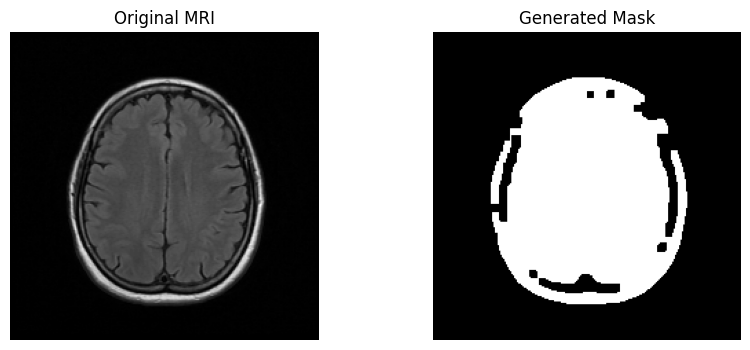

In [21]:
sample_img = image_files[0]
img_path = os.path.join(IMAGE_DIR, sample_img)

img, mask = mri_to_mask(img_path)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original MRI")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Generated Mask")
plt.imshow(mask, cmap='gray')
plt.axis("off")

plt.show()


In [22]:
!pip install --quiet opencv-python matplotlib tqdm


In [23]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


In [27]:
IMAGE_DIR = "/kaggle/input/brain-tumor-for-segmentation/Brain tumor segmentation"
MASK_DIR  = "/kaggle/working/masks"

os.makedirs(MASK_DIR, exist_ok=True)

print("Images:", IMAGE_DIR)
print("Masks :", MASK_DIR)


Images: /kaggle/input/brain-tumor-for-segmentation/Brain tumor segmentation
Masks : /kaggle/working/masks


In [28]:
def generate_mask(img_path):
    # Read MRI image (grayscale)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize (standard for DL)
    img = cv2.resize(img, (224, 224))

    # Gaussian Blur
    blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Otsu Threshold
    _, mask = cv2.threshold(
        blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # Morphological cleaning
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return img, mask


In [29]:
image_list = os.listdir(IMAGE_DIR)

for img_name in tqdm(image_list):
    img_path = os.path.join(IMAGE_DIR, img_name)

    img, mask = generate_mask(img_path)

    save_path = os.path.join(MASK_DIR, img_name)
    cv2.imwrite(save_path, mask)

print("✅ All masks generated and saved!")


100%|██████████| 955/955 [00:03<00:00, 289.63it/s]

✅ All masks generated and saved!


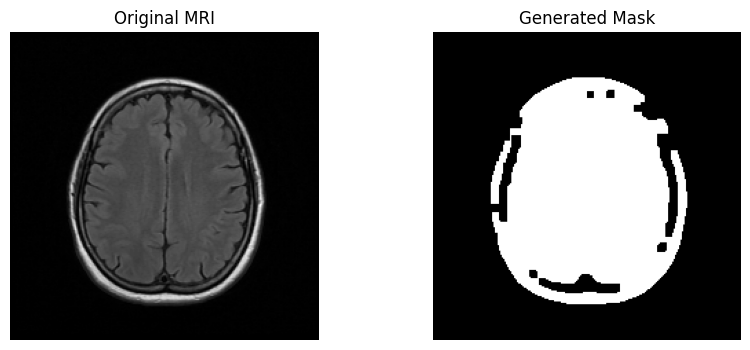

In [30]:
sample = image_list[0]
img_path = os.path.join(IMAGE_DIR, sample)

img, mask = generate_mask(img_path)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Original MRI")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Generated Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


In [31]:
print("Total images:", len(os.listdir(IMAGE_DIR)))
print("Total masks :", len(os.listdir(MASK_DIR)))


Total images: 955
Total masks : 955
